<a href="https://colab.research.google.com/github/dipit099/Deep_Learning-Colab/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [203]:
train_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic/train.csv')
test_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic/test.csv')


In [204]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
train_data.shape

(891, 12)

In [206]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [207]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [208]:
object_columns = train_data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [209]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Create a scatter plot
# sns.scatterplot(x='Fare', y='Survived', data=train_data, hue='Survived', palette={0: 'red', 1: 'green'})

# # Set the title and labels
# plt.title('Fare vs Survived (Scatter Plot)')
# plt.xlabel('Fare')
# plt.ylabel('Survived (0 = No, 1 = Yes)')

# # Show the plot
# plt.show()


In [211]:
train_data = train_data.drop(['Name', 'Parch', 'SibSp', 'Ticket', 'Cabin'], axis=1)

In [212]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [213]:
# # Data Loading and Preprocessing:

imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

# #handle categorical data
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le


In [214]:
X_tt = train_data.drop(['PassengerId', 'Survived'], axis=1)
y_tt = train_data['Survived']



In [215]:
# # # Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


In [216]:
# convert to numpy arrays...ONCE possible only
X= X_tt.values
y= y_tt.values

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

In [219]:
print(type(X_tt))
print(type(X))
print(type(X_train))

# <class 'pandas.core.frame.DataFrame'>
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [220]:
# Step 4: Convert to PyTorch tensors
# Convert X features to float tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

# Convert y labels to long tensors
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Verify lengths
len(X_train_tensor), len(X_test_tensor), len(y_train_tensor), len(y_test_tensor)

(712, 179, 712, 179)

In [221]:
# Loaded into tensor model.. otherwise u cant use tensor functions
# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


len(train_loader), len(test_loader)

(23, 6)

In [222]:
# # Model Definition


class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.layer_1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer_2 = nn.Linear(128, 64)
        self.layer_3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()  # using ReLU activation function

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x



In [223]:
model = TitanicModel()
criterion = nn.BCEWithLogitsLoss()      # loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)  # using Adam as optimizer and learning rate


In [224]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

In [225]:
# Training loop
# Initialize lists to store losses and accuracies
epoch_count = []
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []

# Set the random seed for reproducibility
torch.manual_seed(32)
epochs = 500

for epoch in range(epochs):
    model.train()  # Set the model to training mode

    total_loss = 0
    correct_train = 0
    total_train = 0

    for batch_X, batch_y in train_loader:
        # 1. Forward pass
        y_logits = model(batch_X).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to prediction probabilities, then to prediction labels

        # 2. Calculate loss and accuracy
        loss = criterion(y_logits, batch_y.float())
        total_loss += loss.item()

        # Accuracy calculation
        acc = accuracy_fn(y_true=batch_y, y_pred=y_pred)
        correct_train += (y_pred.squeeze() == batch_y).sum().item()
        total_train += len(batch_y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    train_acc = (correct_train / total_train) * 100

    # Evaluate on the test set after each epoch
    model.eval()
    with torch.no_grad():
        correct_test = 0
        total_test = 0

        test_logits = model(X_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))  # Convert logits to prediction probabilities, then to prediction labels

        # Count correct predictions and total predictions
        correct_test = (test_pred.squeeze() == y_test_tensor).sum().item()
        total_test = len(y_test_tensor)

        test_loss = criterion(test_logits, y_test_tensor.float())
        test_acc = (correct_test / total_test) * 100

    # Store values for plotting
    epoch_count.append(epoch)
    train_loss_values.append(avg_train_loss)
    test_loss_values.append(test_loss.item())
    train_acc_values.append(train_acc)
    test_acc_values.append(test_acc)

    # Print out the progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {avg_train_loss:.5f}, Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
print(f"Epoch: {epoch+1} | Train Loss: {avg_train_loss:.5f}, Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
print(f"Total Correct Test Predictions: {correct_test}")
print(f"Total Test Samples: {total_test}")


Epoch: 0 | Train Loss: 1.17032, Train Accuracy: 62.22% | Test Loss: 0.63959, Test Accuracy: 68.16%
Epoch: 100 | Train Loss: 0.41055, Train Accuracy: 83.01% | Test Loss: 0.45817, Test Accuracy: 79.33%
Epoch: 200 | Train Loss: 0.35922, Train Accuracy: 83.43% | Test Loss: 0.49043, Test Accuracy: 81.56%
Epoch: 300 | Train Loss: 0.36871, Train Accuracy: 84.41% | Test Loss: 0.53191, Test Accuracy: 81.56%
Epoch: 400 | Train Loss: 0.34189, Train Accuracy: 83.57% | Test Loss: 0.51339, Test Accuracy: 81.56%
Epoch: 500 | Train Loss: 0.35111, Train Accuracy: 84.41% | Test Loss: 0.55039, Test Accuracy: 80.45%
Total Correct Test Predictions: 144
Total Test Samples: 179


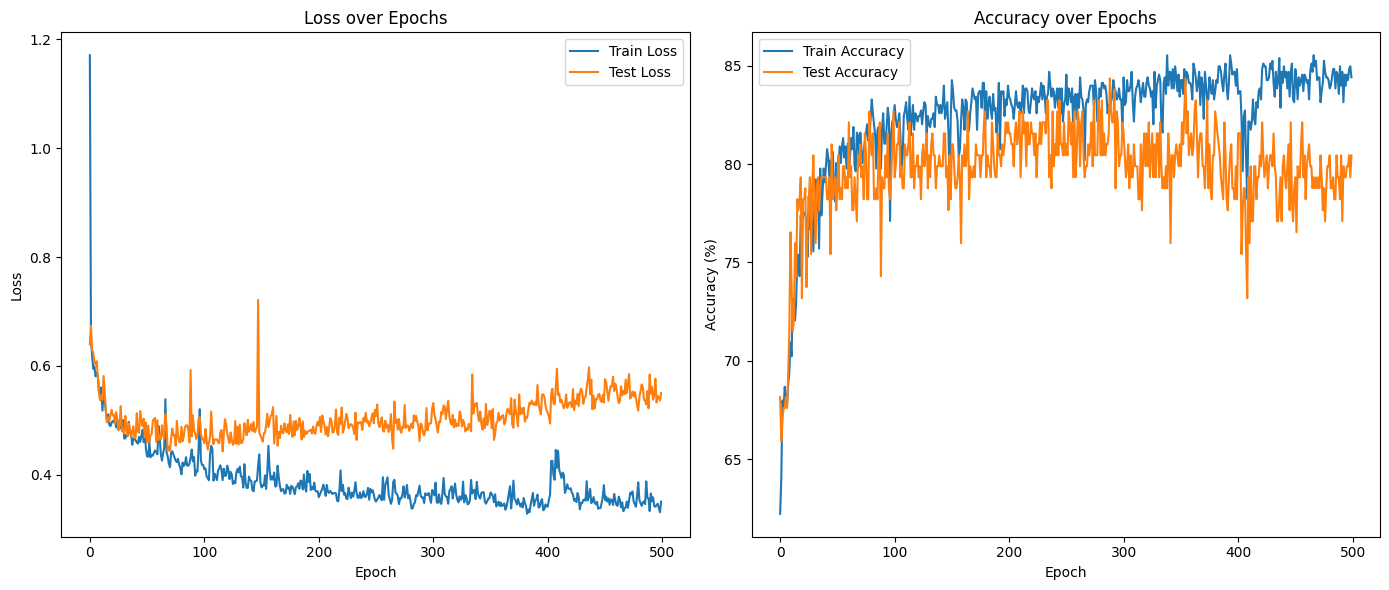

In [226]:
# Plot the training and test loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
# Plot the training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_acc_values, label='Train Accuracy')
plt.plot(epoch_count, test_acc_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

In [187]:
# torch.manual_seed(42)
# epochs = 200
# epoch_count = []
# train_loss_values = []
# test_loss_values = []

# # Training loop
# for epoch in range(epochs):
#     model.train()
#     for batch_X, batch_y in train_loader:
#         # Forward pass
#         y_pred = model(batch_X).squeeze()  # Get predicted results and remove extra dimensions

#         # Measure the loss/error
#         loss = criterion(y_pred, batch_y.float())  # Convert batch_y to float for BCEWithLogitsLoss

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # Evaluate on the test set after each epoch
#     model.eval()
#     with torch.inference_mode():
#         # Use torch.round and torch.sigmoid to get predicted classes
#         y_preds = torch.round(torch.sigmoid(model(X_test_tensor))).squeeze()

#         # Calculate test loss
#         test_loss = criterion(y_preds, y_test_tensor.float())

#     if epoch % 10 == 0:
#         # Record losses
#         epoch_count.append(epoch)
#         train_loss_values.append(loss.item())
#         test_loss_values.append(test_loss.item())

#         print(f'Epoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}')



In [188]:
# Predictions

test_data = test_data.drop(['Name', 'Parch', 'SibSp', 'Ticket', 'Cabin'], axis=1)
test_data['Age'] = imputer.transform(test_data[['Age']])

for column in ['Sex', 'Embarked']:
    test_data[column] = label_encoders[column].transform(test_data[column])



In [189]:
#dont remove rows from testdata
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
Fare,1
Embarked,0


In [190]:
test_data.shape

(418, 6)

In [191]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [192]:
# Prepare the test data for prediction
# Drop the 'PassengerId' column as it's not a feature
X_test = test_data.drop(['PassengerId'], axis=1)

# Save the 'PassengerId' column to use later for the output file
PassengerId = test_data['PassengerId']

# Apply the same scaler used on the training data to the test data
# X_test = scaler.transform(X_test)

# Convert the scaled test data to a PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test.values)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for prediction
with torch.no_grad():
    # Forward pass: compute the model output for the test data
    outputs = model(X_test_tensor).squeeze()

    # Convert logits to probabilities and then to binary predictions
    predictions = torch.round(torch.sigmoid(outputs)).long()



In [193]:
# Create a DataFrame to store the 'PassengerId' and the corresponding predictions
output_df = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': predictions.numpy()
})

# Save the predictions to a CSV file
output_df.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic/output.csv', index=False)

# Print a message indicating that the output has been saved
print('Output saved to output.csv')


Output saved to output.csv
